<a href="https://colab.research.google.com/github/hai1862003/NobelPrizeAnalyze/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [24]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [26]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [27]:
df_data = pd.read_csv('/content/Data/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [29]:
df_data.head()
#which year 1st nobel prize given
first_nobel = df_data.sort_values('year').head(1) #sort data low to high by year then take the 1st
print(f"the year which the 1st nobel prize was given is {first_nobel['year'].values[0]}")

the year which the 1st nobel prize was given is 1901


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [30]:
df_data.duplicated().any()
#no duplicated data

False

### Check for NaN Values

In [31]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [32]:
#column with count of NaN values
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [33]:
#how many nAn values per column:

# create a list of column name that has NaN values to loop through
for column in df_data.columns:
#count naN values of each column
  nan_amount = df_data[column].isna().sum()
  if nan_amount >0:
    print(f'{column} has {nan_amount} of NaN values')


motivation has 88 of NaN values
birth_date has 28 of NaN values
birth_city has 31 of NaN values
birth_country has 28 of NaN values
birth_country_current has 28 of NaN values
sex has 28 of NaN values
organization_name has 255 of NaN values
organization_city has 255 of NaN values
organization_country has 254 of NaN values
ISO has 28 of NaN values


In [34]:
#why birthdate NaN
df_data[df_data['birth_date'].isna()][['birth_date', 'full_name']]
#==> birth_date NAN : prize given to institute ==> makes sense if birth info(date,city, country) + org_name are nAN
df_data[df_data['organization_name'].isna()][['full_name','organization_name']]
# also: org_name nAn ==> individuals with no affiliation with any organization.

,full_name,organization_name
1,Sully Prudhomme,NaN
3,Frédéric Passy,NaN
4,Jean Henry Dunant,NaN
7,Christian Matthias Theodor Mommsen,NaN
9,Charles Albert Gobat,NaN
...,...,...
932,Nadia Murad,NaN
942,Peter Handke,NaN
946,Abiy Ahmed Ali,NaN
954,Louise Glück,NaN


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [35]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])


#### Add a Column with the Prize Share as a Percentage

In [36]:
#data type of prize_share => object
#extract column to list
list_pshare =  df_data['prize_share'].to_list()
#extract 2nd char (after/) and convert to int
list_percent = []
for portion in list_pshare:
  total_prize = (portion.split('/')) #split into 1 and total
  percent = int(total_prize[0])/ int(total_prize[1]) #turn each into integer and divide
  list_percent.append(percent) #add to a list

#add list to as a column in df
df_data['share_pct'] = list_percent

df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25


In [37]:
#move share_pct next to prize_share
#get index of column next to prize share (laureate_type)
cols = df_data.columns
lau_type_index = cols.get_loc('laureate_type')

#move sharepct next to prize_share
pop_col = df_data.pop('share_pct') #pop column out
df_data.insert(lau_type_index, pop_col.name, pop_col) #put column back at index = lau_type

df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
share_pct                       float64
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [38]:
#groupby sex+ agg(sum prizes)
prize_by_sex = df_data.groupby('sex').agg({'prize': pd.Series.count})
prize_by_sex = prize_by_sex.reset_index()


In [39]:
fig = px.pie(data_frame = prize_by_sex,
             names = 'sex' ,
             values = 'prize',
             hole = 0.3,
             title = 'Nobel Winners by gender' )
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [40]:
  #first 3 female nobel lauriates
first_3_females = df_data.loc[df_data['sex'] == 'Female'].head(3) #locate row where
                                                                                #'sex' = gender, take 1st 3
first_3_females

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,0.25,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,1.00,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,1.00,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE


In [41]:
#name of them
first_3_females['full_name']
#what did they win the prize for
first_3_females[['full_name', 'category']]
#birth country
first_3_females[['full_name', 'birth_country', 'organization_name']]

,full_name,birth_country,organization_name
18,"Marie Curie, née Sklodowska",Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [42]:
#ppl won >1
duplicate_true = df_data.duplicated('full_name', keep = False)
#print out ppl who won >1
duplicate_winner = df_data.loc[duplicate_true == True, ['year',	'category'	,'prize', 'full_name']]
# name of duplicate winner and won time
duplicate_winner.groupby('full_name').agg({'prize': pd.Series.count})

,prize
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [43]:
#prizes count by category
prize_by_cat = df_data.groupby('category').agg({'prize': pd.Series.count})
prize_by_cat = prize_by_cat.reset_index()
prize_by_cat = prize_by_cat.sort_values('prize')

fig = px.bar(data_frame = prize_by_cat,
             x= 'category',
             y ='prize',
             title = 'Nobel prizes by category',
             text_auto = True,
             color_continuous_scale= 'Aggrnyl', color ='prize')

fig.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale = False,
                    yaxis_title='Number of Prizes')
fig.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [44]:
#1st Economic prize
df_data[df_data['category'] == 'Economics'].head(1)

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,0.50,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [45]:
#prizes by cat and gender
prize_sex_cat = df_data.groupby(['sex', 'category'], as_index = False).agg({'prize' : pd.Series.count})

prize_sex_cat = prize_sex_cat.sort_values('prize', ascending = False)

In [46]:
fig = px.bar(data_frame = prize_sex_cat, x = 'category', y = 'prize', color = 'sex')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [47]:
#prizes count every year
prize_year = df_data.groupby('year', as_index = False).agg({'prize': pd.Series.count}) #create dataframe

rolling_line = prize_year.rolling(5, on = 'year').mean() #smoothout data by prize

prize_year

,year,prize
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5
...,...,...
112,2016,11
113,2017,12
114,2018,13
115,2019,14


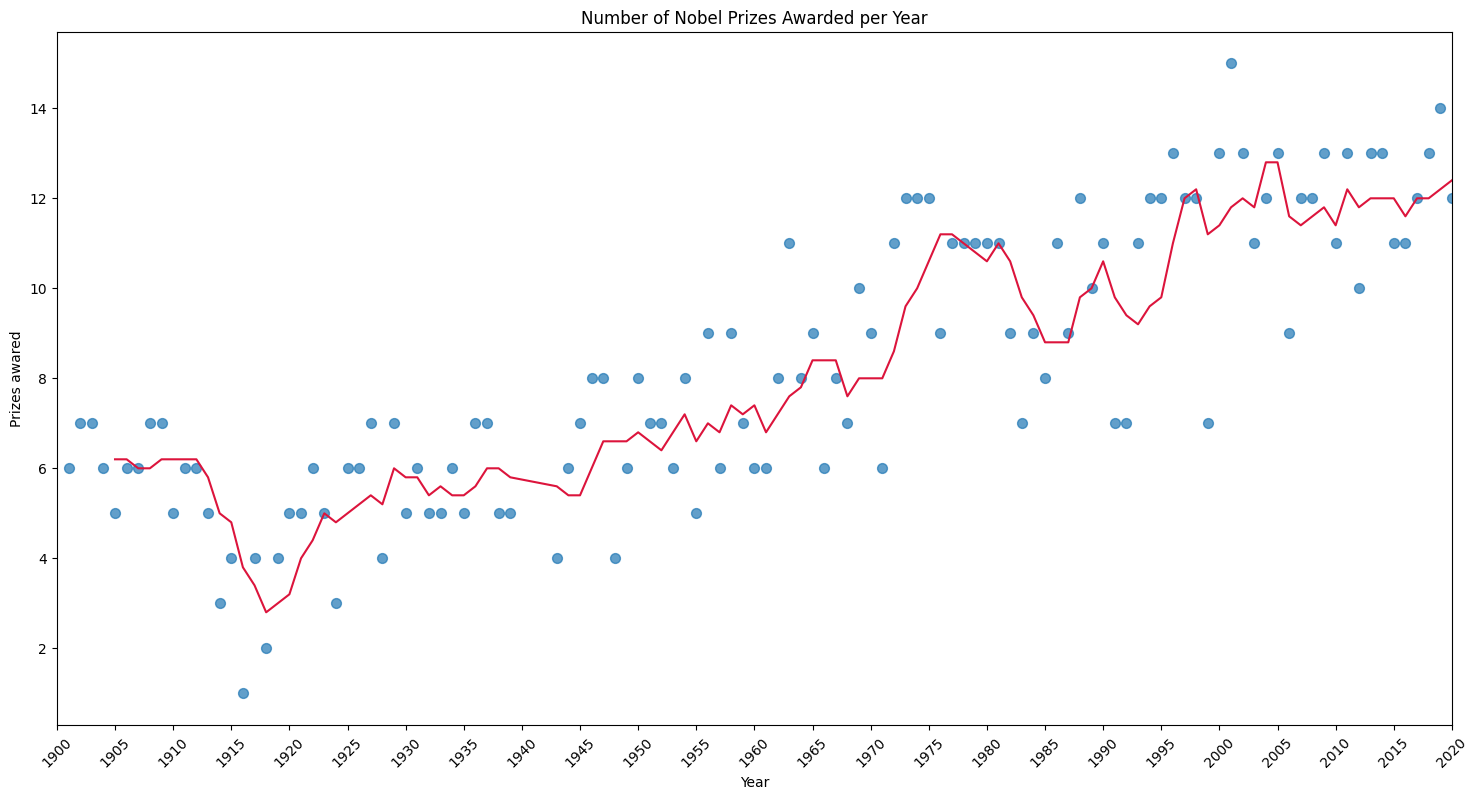

In [48]:
# draw graph
fig, ax  = plt.subplots(figsize =(18,9))
#draw scatterplot
ax.scatter(data = prize_year, x = 'year', y ='prize', alpha = 0.7, s = 50)

#draw rolling average line
ax.plot(prize_year['year'], rolling_line['prize'], color= 'crimson')
#create array 1900-2021 step 5
year_step_5 = np.arange(1900,2021,step = 5)
#set ticks
ax.set_xticks(ticks = year_step_5 , rotation =45, labels = year_step_5, fontsize =10)
#finishing touches
ax.set(xlim = (1900,2020),
       title = 'Number of Nobel Prizes Awarded per Year',
       xlabel = 'Year',
       ylabel = 'Prizes awared')



fig.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [49]:
#average prize share_pct by year
prize_share_yearly = df_data.groupby('year', as_index = False).agg({'share_pct': pd.Series.mean})

#rolling average of prize share
prize_share_roll_avg = prize_share_yearly.rolling(5, on = 'year').mean()

prize_share_roll_avg

,year,share_pct
0,1901,NaN
1,1902,NaN
2,1903,NaN
3,1904,NaN
4,1905,0.82
...,...,...
112,2016,0.52
113,2017,0.50
114,2018,0.50
115,2019,0.50


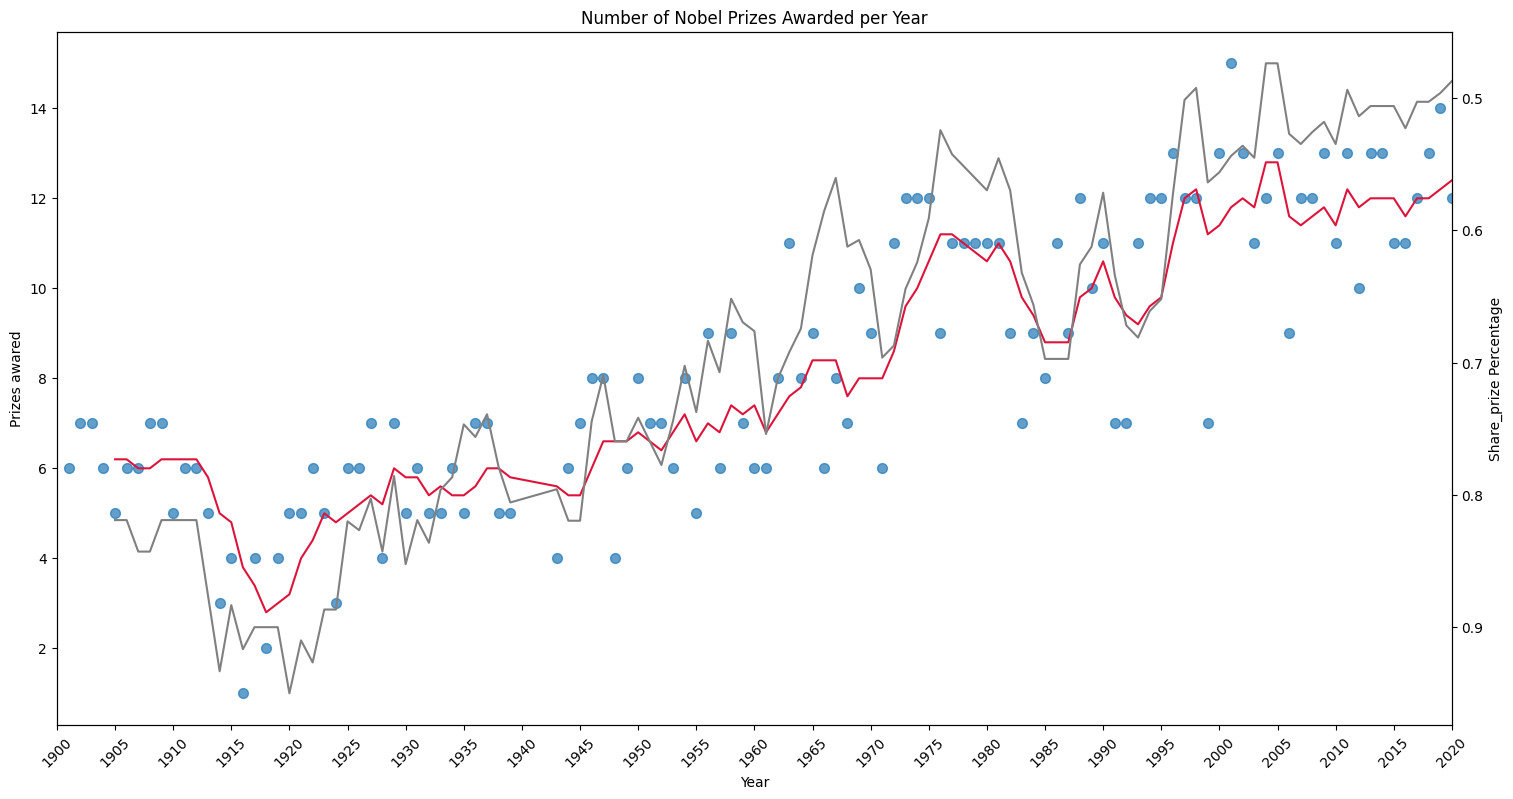

In [50]:
#graph with prizes + prize_share_pct by year

# draw graph
fig, ax  = plt.subplots(figsize =(18,9))
#draw scatterplot
ax.scatter(data = prize_year, x = 'year', y ='prize', alpha = 0.7, s = 50)

#draw rolling average line
ax.plot(prize_year['year'], rolling_line['prize'], color= 'crimson')
#create array 1900-2021 step 5
year_step_5 = np.arange(1900,2021,step = 5)

#draw share_pct line
ax2 = ax.twinx()
ax2.plot(prize_year['year'],prize_share_roll_avg['share_pct'], color = 'gray')

#invert y_axis of share_pct line
ax2.invert_yaxis()
#set ticks
ax.set_xticks(ticks = year_step_5 , rotation =45, labels = year_step_5, fontsize =10)
#finishing touches
ax.set(xlim = (1900,2020),
       title = 'Number of Nobel Prizes Awarded per Year',
       xlabel = 'Year',
       ylabel = 'Prizes awared')
ax2.set(ylabel = 'Share_prize Percentage')


fig.show()

==> Number of Prizes increase and more prizes are being shared (multple contributor)

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [51]:
#top 20 countries table
top_countries = df_data.groupby('birth_country_current', as_index = False).agg({'prize': pd.Series.count})
top_20_countries = top_countries.sort_values('prize', ascending = False).head(20)

top_20_countries

#using birth country_current is best => least null values: but still lost values where birth country is unknown
# birth_country: some old countries may not be relevant
#org_country: some individual may not be affiliated to an organization

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [52]:
#bar chart
hor_bar = px.bar(data_frame = top_20_countries, y = 'birth_country_current', x = 'prize', orientation = 'h', color = 'prize')

#flip bar so US stays on top
hor_bar.update_layout(yaxis = {'autorange': 'reversed'},
                      title = 'Top 20 Countries by Prizes',
                      yaxis_title = 'Country',
                      xaxis_title =' Number of Prizes')

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [53]:
#dataframe for graph
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

#graph
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize',
                          hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.matter)



world_map.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [54]:
#group data
country_prize_by_cat = df_data.groupby(['birth_country_current', 'category'], as_index = False).agg({'prize': pd.Series.count})

#sort values
country_prize_by_cat = country_prize_by_cat.sort_values('prize', ascending = False)

#merge to get total_prize column
merge_df = pd.merge(country_prize_by_cat, top_20_countries, how = 'inner', on = 'birth_country_current')

#change column name
merge_df = merge_df.rename(mapper ={ 'prize_x': 'cat_prize', 'prize_y' : 'total_prize'}, axis = 1)

merge_df

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
104,India,Literature,2,9
105,India,Medicine,2,9
106,India,Chemistry,1,9
107,India,Peace,1,9


In [55]:
#bar chart
hor_bar = px.bar(data_frame = merge_df, y = 'birth_country_current', x = 'total_prize', orientation = 'h', color = 'category')

#flip bar so US stays on top
hor_bar.update_layout(yaxis = {'autorange' : 'reversed'},
                      title = 'Top 20 Countries by Prizes',
                      yaxis_title = 'Country',
                      xaxis_title =' Number of Prizes')

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [56]:
df_data.head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [57]:
#create data
prize_country_year = df_data.groupby(['birth_country_current', 'year'], as_index = False).agg({'prize': pd.Series.count})

#apply cumulative sum
cumulative_prize = prize_country_year.groupby(['birth_country_current', 'year']).sum().groupby(level = [0]).cumsum()
                                                                                   #1st groupby.sum to create a df with multiindex [country, year]
                                                                                    #2nd groupby: level =[0] => groupby "birth_country_current"
#reset index
cumulative_prize = cumulative_prize.reset_index()

#sort value only country = top 20
#merge value with top_20 countries on country column
cumulative_prize_top_20 = pd.merge(cumulative_prize, top_20_countries, how= 'inner', on = 'birth_country_current')
#drop total prize column
cumulative_prize_top_20 = cumulative_prize_top_20.drop('prize_y', axis = 1)
#rename column prize_x
cumulative_prize_top_20 = cumulative_prize_top_20.rename( mapper = {'prize_x': 'prize'}, axis = 1)

cumulative_prize_top_20

,birth_country_current,year,prize
0,Australia,1915,1
1,Australia,1945,2
2,Australia,1960,3
3,Australia,1963,4
4,Australia,1964,5
...,...,...,...
495,United States of America,2016,259
496,United States of America,2017,265
497,United States of America,2018,271
498,United States of America,2019,274


In [58]:
#line chart

line_graph = px.line(data_frame = cumulative_prize_top_20, x = 'year', y = 'prize', color = 'birth_country_current')

line_graph.update_layout(title = 'Prizes of Country Through Time',
                         xaxis_title = 'Year',
                         yaxis_title = 'Number of Prizes',
)

In [59]:
df_data

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,0.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,1.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [60]:
#create df
prize_by_org = df_data.groupby('organization_name', as_index = False).agg({'prize': pd.Series.count})
#see top 20 organization
prize_by_top_org = prize_by_org.sort_values('prize', ascending = False).head(20)

prize_by_top_org

,organization_name,prize
196,University of California,40
68,Harvard University,29
167,Stanford University,23
117,Massachusetts Institute of Technology (MIT),21
198,University of Chicago,20
197,University of Cambridge,18
26,California Institute of Technology (Caltech),17
38,Columbia University,17
146,Princeton University,15
152,Rockefeller University,13


In [61]:
#bar chart
hor_bar = px.bar(data_frame = prize_by_top_org, y = 'organization_name', x = 'prize', orientation = 'h', color = 'prize', text = 'prize')

#flip bar so US stays on top
hor_bar.update_layout(yaxis = {'autorange' : 'reversed'},
                      title = 'Top 20 Countries by Prizes',
                      yaxis_title = 'Country',
                      xaxis_title =' Number of Prizes')

 ==>  University of California  and Harvard stands at top
 Harvard: 29
 U of Chicago: 20

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [62]:
#cities with most discoveries
df_data.head()
#create data
city_by_prize = df_data.groupby('organization_city', as_index = False).agg({'prize': pd.Series.count})
#sort_values, take top 20
city_by_prize = city_by_prize.sort_values('prize', ascending = False).head(20)
city_by_prize

,organization_city,prize
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
156,"Stanford, CA",24
12,"Berkeley, CA",21
39,"Chicago, IL",20
135,"Princeton, NJ",19
129,"Pasadena, CA",17


In [63]:
#bar chart
hor_bar = px.bar(data_frame = city_by_prize, y = 'organization_city', x = 'prize', orientation = 'h', color = 'prize', text = 'prize')

#flip bar so US stays on top
hor_bar.update_layout(yaxis = {'autorange' : 'reversed'},
                      title = 'Top 20 Cities by Prizes',
                      yaxis_title = 'Cities',
                      xaxis_title =' Number of Prizes')

==>  Cambridge and New York stands at top

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [64]:
#birth cities of winners by prize
birth_cities = df_data.groupby('birth_city').agg({'prize': pd.Series.count})
#sort by value and take top 20
top_birth_cities = birth_cities.sort_values('prize', ascending = False).head(20)

top_birth_cities

,prize
birth_city,
"New York, NY",53
Paris,26
London,19
Vienna,14
"Chicago, IL",12
Berlin,11
"Washington, DC",8
"Brooklyn, NY",8
Budapest,8


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [65]:
#df: group prizes by org
country_city_org =df_data.groupby(['organization_country', 'organization_city', 'organization_name'],
                                  as_index =False).agg({'prize': pd.Series.count})

#sort and take 20
country_city_org = country_city_org.sort_values('prize', ascending = False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [66]:
burst = px.sunburst(country_city_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [70]:
#create winning_age column

#create list of birth year
birth_year = df_data['birth_date'].dt.year # .dt.year: grab year from 'datetime' objects

#create age when won
age_when_won = df_data['year'] - birth_year
#put age when won into a column
df_data['age_when_won'] = age_when_won

df_data



,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,age_when_won
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,0.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,1.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,68.00


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [79]:
#oldest winner:
oldest_winner = df_data.sort_values('age_when_won', ascending = False).head(1)

#youngest winner:
youngest_winner = df_data.sort_values('age_when_won', ascending = True).head(1)
#average age
print(f" the average age for winners is {df_data['age_when_won'].mean()}")


 the average age for winners is 59.94860813704497


count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: age_when_won, dtype: float64

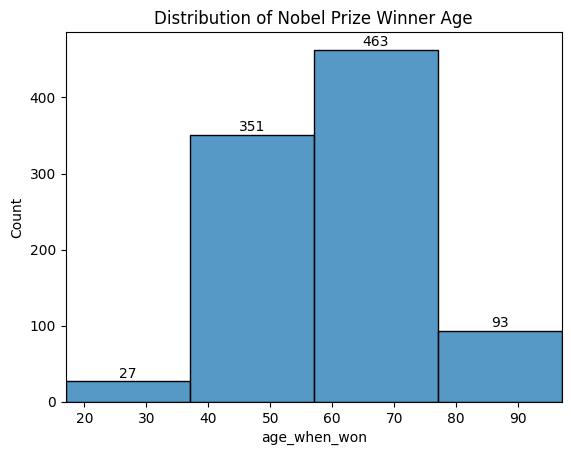

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [101]:
#descriptive statistics
df_data['age_when_won'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: age_when_won, dtype: float64

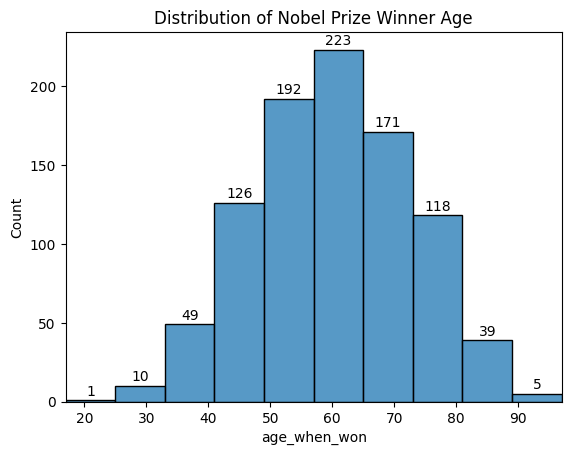

In [108]:
#histogram chart
histogram_age = sns.histplot(data = df_data, x= 'age_when_won', bins =10)

histogram_age.set(xlim=(df_data['age_when_won'].min(), df_data['age_when_won'].max()),
                 title = 'Distribution of Nobel Prize Winner Age')

#label graphs
for p in histogram_age.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 histogram_age.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+3, # y-coordinate position of data label, padded 5 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


regression intercept, coef, r_squared: [-187.19546606], [[0.12534703]], 0.11289181652913838


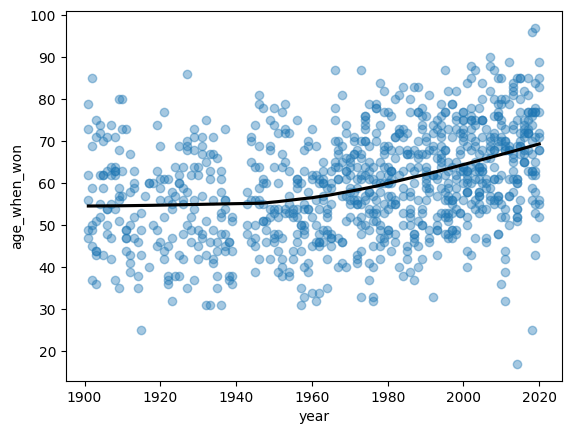

In [132]:
age_through_time = df_data[['year', 'age_when_won']]
age_through_time = age_through_time.dropna()


regression_plot = sns.regplot(data = age_through_time,
                              x ='year',
                              y = 'age_when_won',
                              lowess = True,
                              scatter_kws = {'alpha': 0.4}, #blurry of plots
                              line_kws={'color': 'black'})

#import regression
from sklearn.linear_model import LinearRegression
#create regresion model
regression = LinearRegression()

#turn variable x,y into df
x= pd.DataFrame(age_through_time, columns = ['year'])

# dropna() values for  y values
y= pd.DataFrame(age_through_time, columns = ['age_when_won'])

regression.fit(x,y)


print(f'regression intercept, coef, r_squared: {regression.intercept_}, {regression.coef_}, {regression.score(x,y)}')

==> Only 11% of the changes in age can be explained by year (through time) and in general 1 year increase correlates with 0.12 increase in age of laureates

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

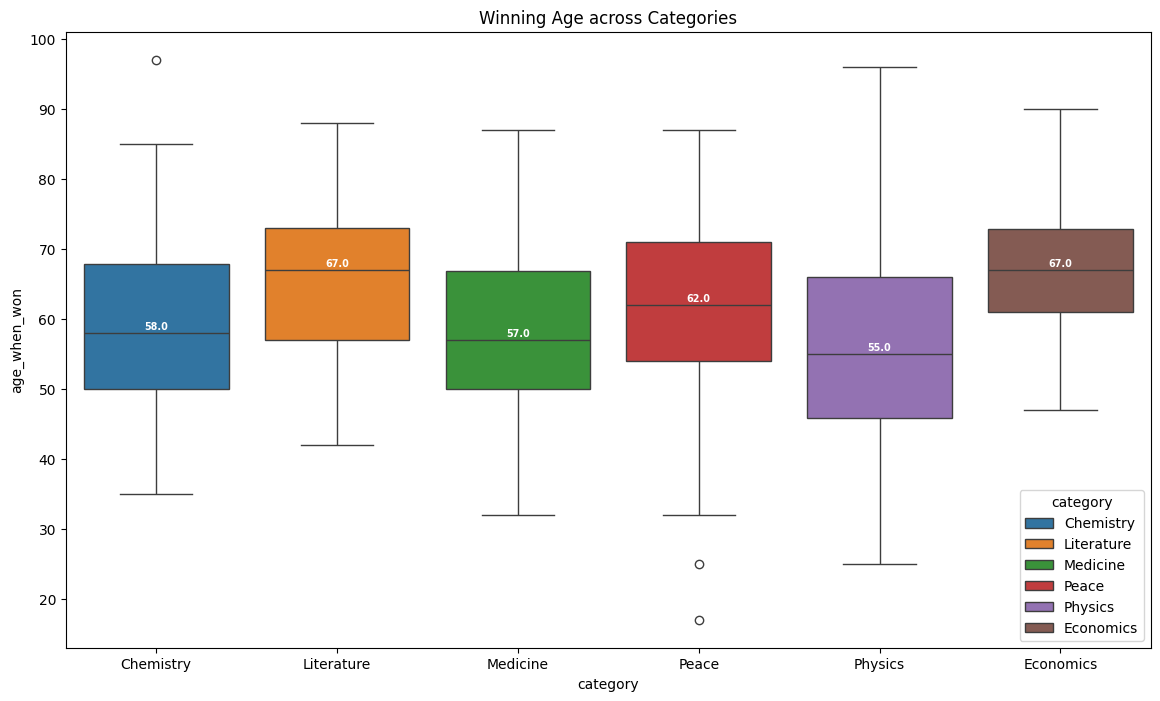

In [169]:

#create graph
fig,ax  = plt.subplots(figsize = (14,8))
ax = sns.boxplot(data = df_data,
                 x = 'category',
                 y = 'age_when_won',
                 hue = 'category',
                 legend = 'full',
                 )
#set title
ax.set(title = 'Winning Age across Categories')

#put median labels in each boxplot
medians = df_data.groupby('category')['age_when_won'].median() #create Series: category + median of age:

for xtick in df_data['category'].unique(): #for each x value in x graph
    ax.text( x= xtick, y = medians[xtick] +0.5, s =medians[xtick],  # put text with x_coor = xtick, y_coor = the median +0.5(for display), string to show = median
            horizontalalignment='center',size='x-small',color='w',weight='semibold')





**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


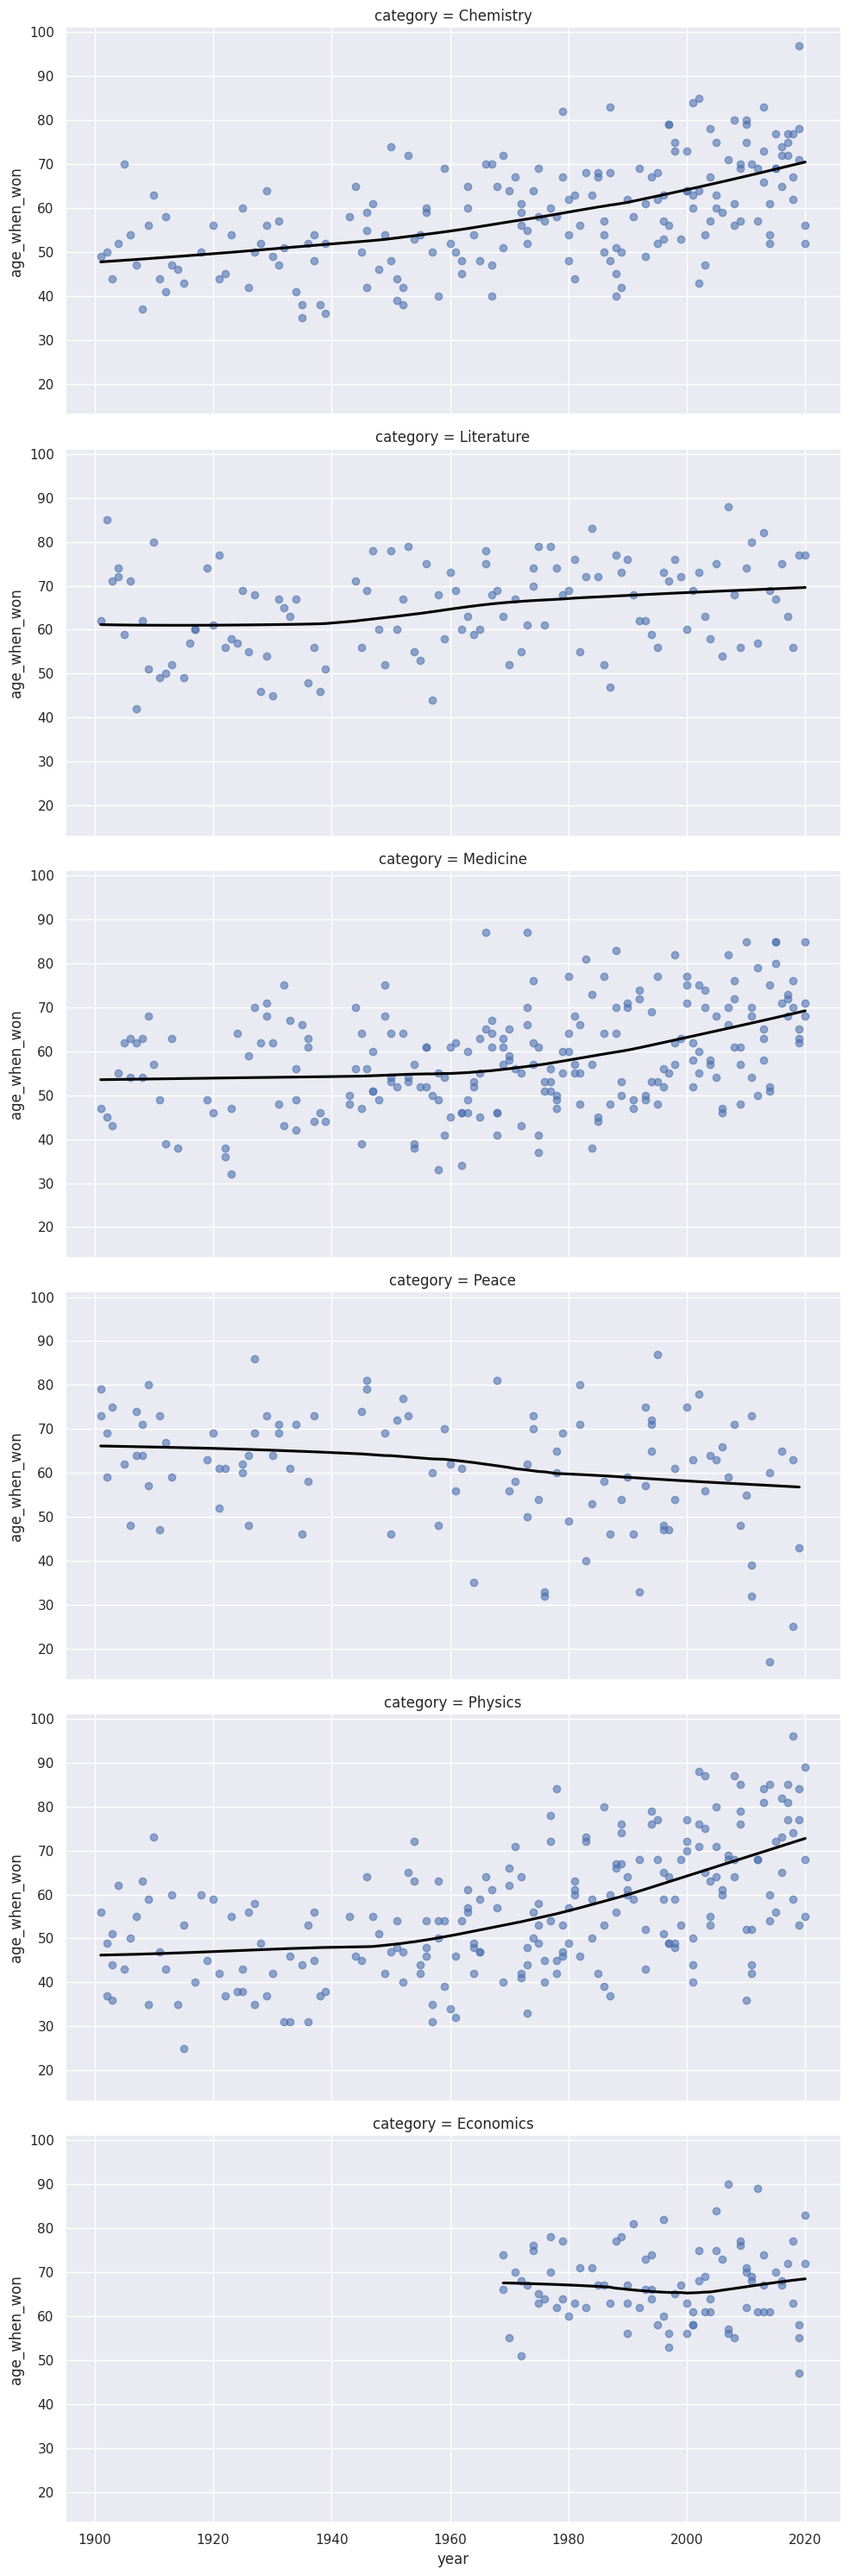

In [189]:
#age_win and year in each chart


sns.lmplot(data = df_data,
                 x= 'year',
                 y='age_when_won',
                 row = 'category',
                lowess =True,
                aspect=2,   # change size of figure
                 scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},
           )


plt.show()

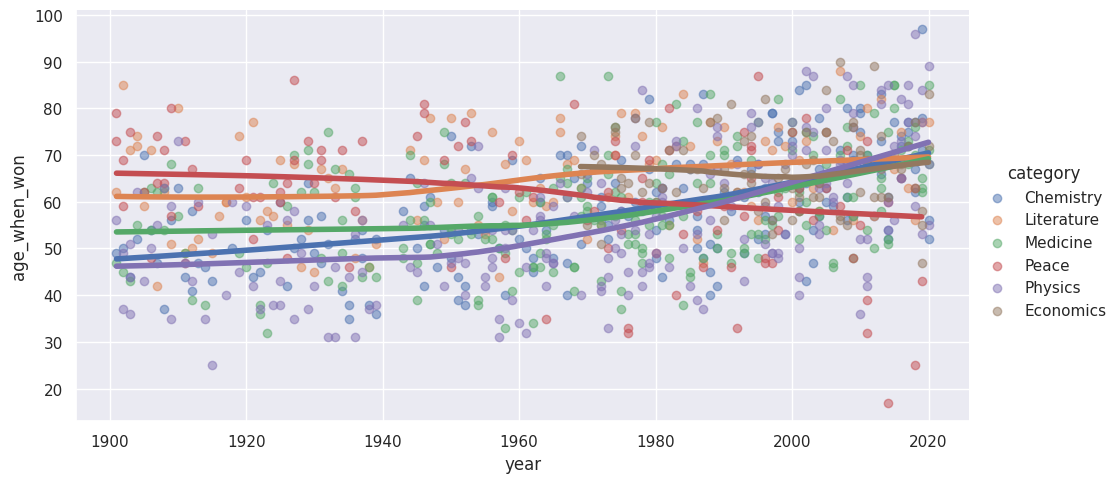

In [192]:
#age_win and year all 1 chart, color =category
sns.lmplot(data=df_data,
               x='year',
               y='age_when_won',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth':4})

plt.show()

==> Without looking at R-Squared, winners seems to be olders as time pass by except for Peace, which shows opposite trend.
Econ is a relatively new category, hence the short graph